# 22110007 - Trần Duy An

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

Age- Age Of The Customer

Employment Type- The Sector In Which Customer Is Employed

GraduateOrNot- Whether The Customer Is College Graduate Or Not

AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]

FamilyMembers- Number Of Members In Customer's Family

ChronicDisease- Whether The Customer Suffers From Any Major Disease Or
Conditions Like Diabetes/High BP or Asthama,etc.

FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].

EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]

TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

In [1]:
pip install ydata-profiling

## Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# This notebook performs a classification task to predict travel insurance purchase.
# It includes data loading, preprocessing, feature engineering, data splitting and resampling,
# model building (Random Forest and Logistic Regression) using GridSearchCV,
# model evaluation, and comparison.

# Data loading and initial analysis
# Load the dataset from Google Drive
PATH = "/content/drive/MyDrive/KHTN/NMMH/Tuan3/TravelInsurancePrediction.csv"

# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
df = pd.read_csv(PATH)
display(df.head())
#ToDo: Show histogram of dataframe

First 5 rows of the dataset:


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Data Analysis

In [4]:
# Data analysis
# Todo: analyze your data here

In [5]:
# Get categorical columns and numerical columns
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [6]:
numerical_features

['Unnamed: 0',
 'Age',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases',
 'TravelInsurance']

In [7]:
numerical_features

['Unnamed: 0',
 'Age',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases',
 'TravelInsurance']

In [8]:
# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


In [9]:
# Display basic statistical summary of numerical columns to understand data distribution
print("\nBasic statistical summary of numerical columns:")
display(df.describe())


Basic statistical summary of numerical columns:


,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [10]:
from ydata_profiling import ProfileReport

In [11]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 32.42it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='TravelInsurance', ylabel='Count'>

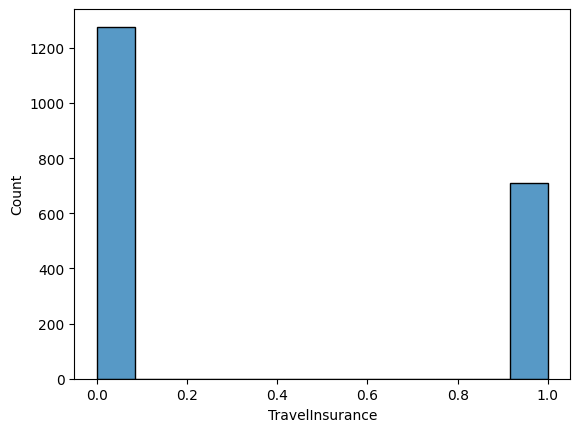

In [12]:
#Xem phân phối của TravelInsurance
sns.histplot(x="TravelInsurance", data=df)

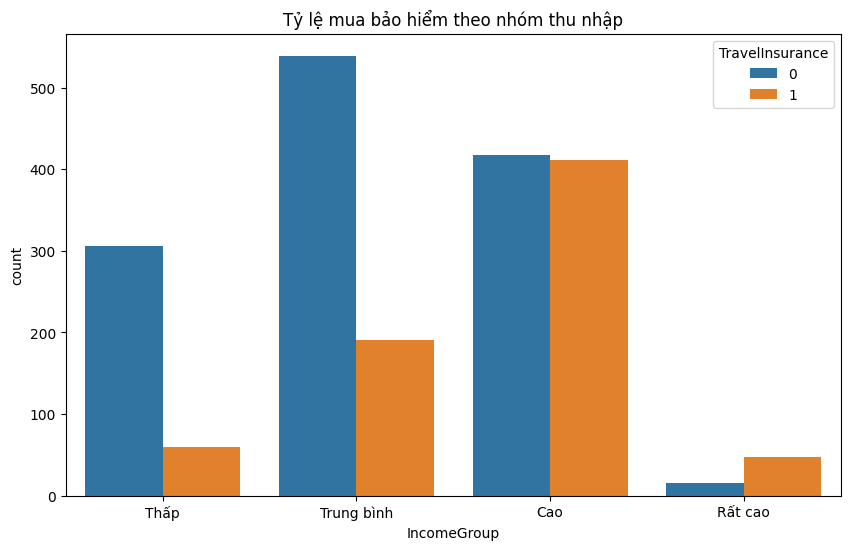

In [13]:
# Tạo nhóm thu nhập
df['IncomeGroup'] = pd.cut(df['AnnualIncome'], bins=[0, 500000, 1000000, 1500000, 2000000],
                           labels=['Thấp', 'Trung bình', 'Cao', 'Rất cao'])

# Biểu đồ tỷ lệ mua bảo hiểm theo nhóm thu nhập
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='IncomeGroup', hue='TravelInsurance')
plt.title('Tỷ lệ mua bảo hiểm theo nhóm thu nhập')
plt.show()
df.drop(columns=['IncomeGroup'], inplace=True)


<Figure size 1200x800 with 0 Axes>

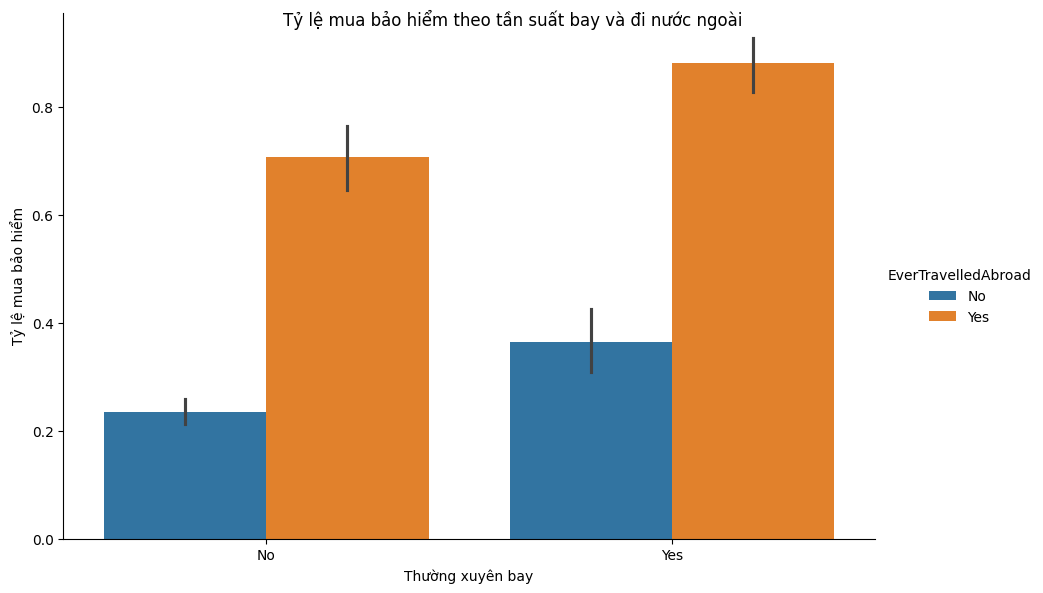

In [14]:
# Biểu đồ kết hợp giữa tần suất bay và đi nước ngoài
plt.figure(figsize=(12, 8))
g = sns.catplot(data=df, x='FrequentFlyer', y='TravelInsurance', hue='EverTravelledAbroad',
               kind='bar', height=6, aspect=1.5)
g.set_axis_labels('Thường xuyên bay', 'Tỷ lệ mua bảo hiểm')
g.fig.suptitle('Tỷ lệ mua bảo hiểm theo tần suất bay và đi nước ngoài')
plt.show()


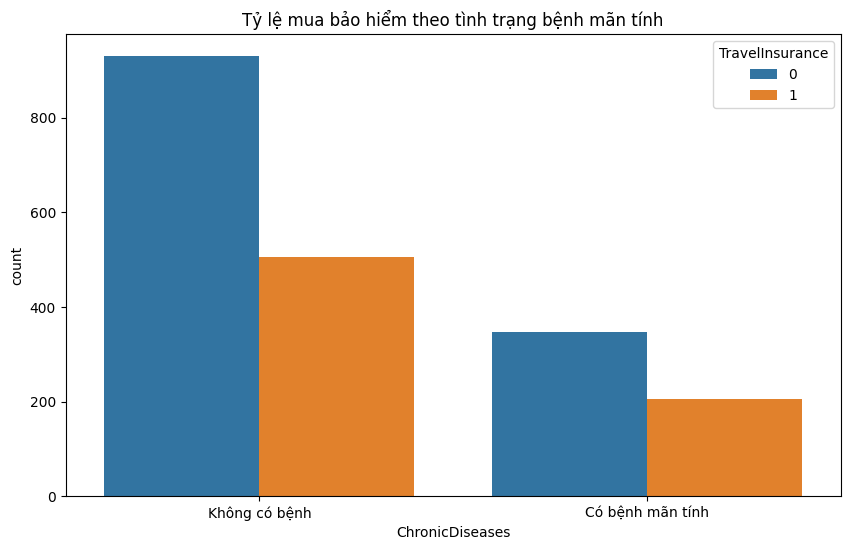

In [15]:
# Biểu đồ tỷ lệ mua bảo hiểm theo tình trạng bệnh mãn tính
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ChronicDiseases', hue='TravelInsurance')
plt.title('Tỷ lệ mua bảo hiểm theo tình trạng bệnh mãn tính')
plt.xticks([0, 1], ['Không có bệnh', 'Có bệnh mãn tính'])
plt.show()


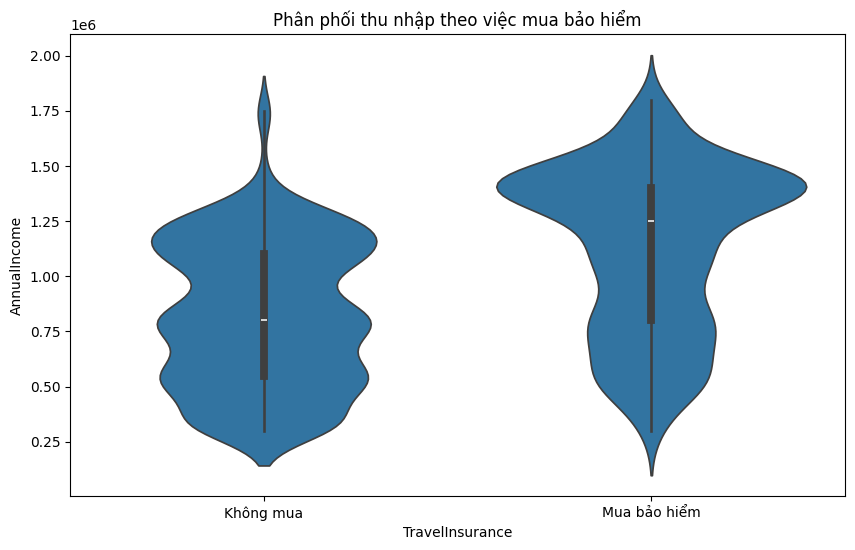

In [16]:
# Biểu đồ violin thể hiện phân phối thu nhập theo việc mua bảo hiểm
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='TravelInsurance', y='AnnualIncome')
plt.title('Phân phối thu nhập theo việc mua bảo hiểm')
plt.xticks([0, 1], ['Không mua', 'Mua bảo hiểm'])
plt.show()


## Preprocessing

In [17]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.drop(columns= "Unnamed: 0", axis= 1)
    return df

In [18]:
df = preprocessing_data(df.copy())
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Feature Engineering

<Axes: >

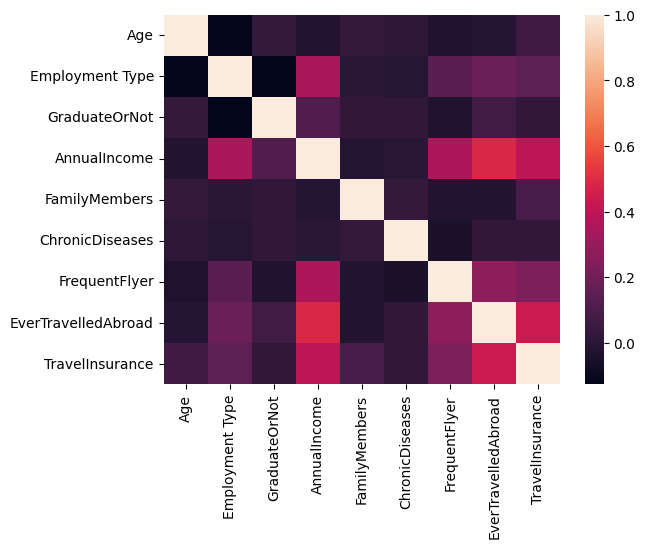

In [19]:
# Heatmap
import seaborn as sns

# Feature Engineering
# Apply feature engineering to convert categorical features to numerical codes
# This step prepares the data for models that require numerical input

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    for col in categorical_features:
        df[col] = df[col].astype("category").cat.codes
    return df

# Apply the feature engineering function to the DataFrame
df = apply_feature_engineering(df.copy()) # Use a copy to avoid modifying the original DataFrame if it's needed later

sns.heatmap(df.corr()) # Show heatmap after normalized data

# Apply machine learning model

## Train-test split

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def apply_smote(X, y, sampling_strategy='auto', random_state=42, k_neighbors=5):
    """
    Applies SMOTE oversampling to balance the dataset.

    Args:
        X: Feature matrix.
        y: Target variable.
        sampling_strategy: Sampling strategy for SMOTE.
        random_state: Random state for reproducibility.
        k_neighbors: Number of nearest neighbors to use for SMOTE.

    Returns:
        tuple: (X_resampled, y_resampled) - resampled features and target.
    """
    smote = SMOTE(sampling_strategy=sampling_strategy,
                  random_state=random_state,
                  k_neighbors=k_neighbors)

    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(columns=['TravelInsurance']) # Todo: Select features
    y = df['TravelInsurance'] # Todo: Select label

    X, y = apply_smote(X, y) # Apply SMOTE here
    return X, y

X, y = prepare_X_y(df)

RANDOM_STATE = 42
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

print("Training features shape:", trainX.shape)
print("Testing features shape:", testX.shape)
print("Training target shape:", trainY.shape)
print("Testing target shape:", testY.shape)

Training features shape: (2043, 8)
Testing features shape: (511, 8)
Training target shape: (2043,)
Testing target shape: (511,)


## Build SK-learn model

# Train Model

In [21]:
def build_model_rf(trainX, trainY):
    """
    Design and train a RandomForestClassifier model using GridSearchCV.

    Args:
        trainX: Training feature matrix.
        trainY: Training target variable.

    Returns:
        tuple: (best_estimator, best_params) - the best trained model and its parameters.
    """

    # Create a pipeline that includes the preprocessor and RandomForestClassifier model
    rf_pipeline = make_pipeline(
        RandomForestClassifier(random_state=42)
    )

    # Define a parameter grid for GridSearchCV
    param_grid_rf = {
        'randomforestclassifier__n_estimators': [10, 20, 50],
        'randomforestclassifier__max_depth': [5, 10, 20, None],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4],
        'randomforestclassifier__max_features': ['sqrt', 'log2', None],
        'randomforestclassifier__bootstrap': [True, False]
    }

    # Instantiate GridSearchCV
    grid_search_rf = GridSearchCV(
        rf_pipeline,
        param_grid_rf,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1
    )

    # Fit the GridSearchCV object to the training data
    grid_search_rf.fit(trainX, trainY)

    return grid_search_rf.best_estimator_, grid_search_rf.best_params_


def build_model_lr(trainX, trainY):
    """
    Design and train a Logistic Regression model using GridSearchCV.

    Args:
        trainX: Training feature matrix.
        trainY: Training target variable.

    Returns:
        tuple: (best_estimator, best_params) - the best trained model and its parameters.
    """
     # Identify numerical and categorical features for preprocessing
    numerical_features = [col for col in trainX.columns if trainX[col].dtype != 'object']
    categorical_features = [col for col in trainX.columns if trainX[col].dtype == 'object']

    # Create a column transformer for preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough' # Keep other columns (like 'Unnamed: 0') as they are
    )

    # Create a pipeline that includes the preprocessor and Logistic Regression model
    lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression(random_state=RANDOM_STATE))])

    # Define a parameter grid for GridSearchCV
    param_grid_lr = {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l2'], # LogisticRegression with 'lbfgs' solver only supports 'l2' penalty
        'classifier__solver': ['lbfgs', 'liblinear'] # 'liblinear' also supports 'l1'
    }

    # Instantiate GridSearchCV
    grid_search_lr = GridSearchCV(
        lr_pipeline,
        param_grid_lr,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1
    )

    # Fit the GridSearchCV object to the training data
    grid_search_lr.fit(trainX, trainY)

    return grid_search_lr.best_estimator_, grid_search_lr.best_params_

# Example usage (assuming trainX and trainY are already defined from previous steps):
rf_model, rf_params = build_model_rf(trainX, trainY)
lr_model, lr_params = build_model_lr(trainX, trainY)

print("Best Random Forest Model:", rf_model)
print("Best Random Forest Parameters:", rf_params)
print("\nBest Logistic Regression Model:", lr_model)
print("Best Logistic Regression Parameters:", lr_params)

Best Random Forest Model: Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, max_features='log2',
                                        min_samples_leaf=2, n_estimators=10,
                                        random_state=42))])
Best Random Forest Parameters: {'randomforestclassifier__bootstrap': True, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 10}

Best Logistic Regression Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Employment Type',
                                                   'GraduateOrNot',
                                                   'AnnualIncome',
   

In [22]:
from sklearn.metrics import classification_report

def calculate_performance(y_true, y_pred):
    """
    Calculates and prints performance metrics for a classification model.

    Args:
        y_true: Ground truth values.
        y_pred: Predicted values.

    Returns:
        float: The main performance score (F1-weighted).
    """
    report = classification_report(y_true, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    accuracy = report['accuracy']

    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

    print(classification_report(y_true, y_pred))

    # Choose one main metric to return
    main_score = f1
    return main_score

def evaluate_model(model, testX, testY):
    """
    Evaluates the trained model on the test set and prints performance metrics.

    Args:
        model: The trained model (pipeline).
        testX: Test feature matrix.
        testY: Test target variable.

    Returns:
        float: The main performance score (F1-weighted).
    """
    y_pred = model.predict(testX)
    print("Performance metrics:")
    main_score = calculate_performance(testY, y_pred)
    return main_score

# Evaluate the Random Forest model
print("Evaluating Random Forest Model:")
rf_f1_score = evaluate_model(rf_model, testX, testY)

# Evaluate the Logistic Regression model
print("\nEvaluating Logistic Regression Model:")
lr_f1_score = evaluate_model(lr_model, testX, testY)

print(f"\nRandom Forest F1-weighted score: {rf_f1_score:.4f}")
print(f"Logistic Regression F1-weighted score: {lr_f1_score:.4f}")

Evaluating Random Forest Model:
Performance metrics:
Precision: 0.7890224582983878
Recall: 0.7729941291585127
Accuracy: 0.7729941291585127
F1 Score: 0.7698750452321859
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       255
           1       0.86      0.66      0.74       256

    accuracy                           0.77       511
   macro avg       0.79      0.77      0.77       511
weighted avg       0.79      0.77      0.77       511


Evaluating Logistic Regression Model:
Performance metrics:
Precision: 0.7213141351378204
Recall: 0.7181996086105675
Accuracy: 0.7181996086105675
F1 Score: 0.7172576755365364
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       255
           1       0.75      0.66      0.70       256

    accuracy                           0.72       511
   macro avg       0.72      0.72      0.72       511
weighted avg       0.72      0.72      0.72       511


Ra

In [23]:
print("\nModel Comparison based on F1-weighted Score:")
print("-" * 40)

if rf_f1_score > lr_f1_score:
    print(f"The Random Forest model (F1-weighted: {rf_f1_score:.4f}) performed better than the Logistic Regression model (F1-weighted: {lr_f1_score:.4f}).")
elif lr_f1_score > rf_f1_score:
     print(f"The Logistic Regression model (F1-weighted: {lr_f1_score:.4f}) performed better than the Random Forest model (F1-weighted: {rf_f1_score:.4f}).")
else:
    print(f"Both models achieved the same F1-weighted score ({rf_f1_score:.4f}).")



Model Comparison based on F1-weighted Score:
----------------------------------------
The Random Forest model (F1-weighted: 0.7699) performed better than the Logistic Regression model (F1-weighted: 0.7173).


In [24]:

def plot_feature_importance(model, feature_names, top_n=20, model_name = 'randomforestclassifier' ):
    """
    Plots the top N feature importances from a trained Random Forest model.

    :param model: Trained pipeline with RandomForestClassifier
    :param feature_names: List of feature names (columns in X)
    :param top_n: Number of top features to show
    """

    # Extract the RandomForestClassifier from the pipeline
    rf = model.named_steps[model_name]

    # Get feature importances
    importances = rf.feature_importances_
    indices = np.argsort(importances)[-top_n:][::-1]  # Top N features

    # Plot
    plt.figure(figsize=(10, 6))
    plt.title(f"Top Feature Importances ({model_name})")
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Importance Score")
    plt.gca().invert_yaxis()  # Highest at top
    plt.tight_layout()
    plt.show()


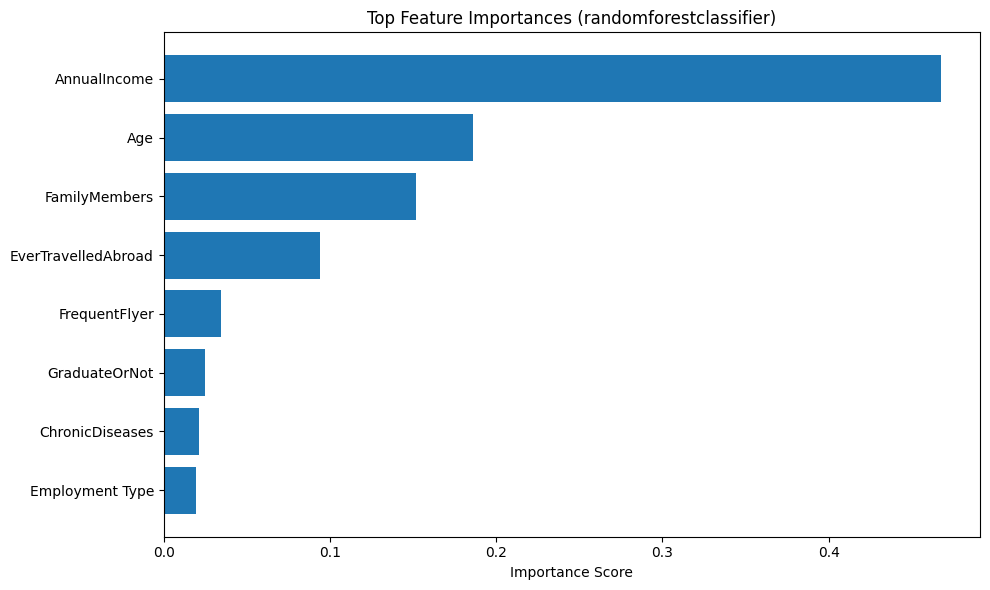

In [25]:
plot_feature_importance(rf_model, feature_names=trainX.columns)

## Kết luận

Trong notebook này, chúng ta đã thực hiện các bước xây dựng mô hình dự đoán khả năng mua bảo hiểm du lịch.

1. **Khám phá dữ liệu:** Chúng ta đã phân tích dữ liệu ban đầu, kiểm tra các giá trị thiếu (không có giá trị thiếu), và xem xét phân phối của các biến. Các biểu đồ trực quan hóa đã giúp chúng ta hiểu rõ hơn về mối quan hệ giữa các đặc trưng như thu nhập, tần suất bay, tình trạng bệnh mãn tính và quyết định mua bảo hiểm. Đặc biệt, chúng ta đã thấy sự phân bố không cân bằng của biến mục tiêu "TravelInsurance", điều này đã được xử lý bằng kỹ thuật SMOTE.
2. **Tiền xử lý và Feature Engineering:** Chúng ta đã thực hiện tiền xử lý cơ bản bằng cách loại bỏ cột 'Unnamed: 0' không cần thiết và mã hóa các biến phân loại sang dạng số để chuẩn bị dữ liệu cho mô hình. Bước này đảm bảo dữ liệu ở định dạng phù hợp cho các thuật toán machine learning.
3. **Xây dựng và đánh giá mô hình:** Hai mô hình phân loại là Random Forest và Logistic Regression đã được xây dựng và tinh chỉnh bằng GridSearchCV để tìm ra các siêu tham số tối ưu. Dựa trên kết quả đánh giá trên tập dữ liệu kiểm tra, mô hình Random Forest đã cho thấy hiệu suất vượt trội đáng kể so với Logistic Regression, với chỉ số F1-weighted cao hơn. Điều này chứng tỏ Random Forest có khả năng nắm bắt các mẫu phức tạp trong dữ liệu tốt hơn, dẫn đến dự đoán chính xác hơn.
4. **Phân tích Feature Importance (Random Forest):** Dựa trên mô hình Random Forest, chúng ta đã phân tích tầm quan trọng của các đặc trưng. Kết quả phân tích này chỉ ra những yếu tố nào (ví dụ: Age, Annual Income, EverTravelledAbroad) có ảnh hưởng lớn nhất đến khả năng mua bảo hiểm của khách hàng. Thông tin này rất hữu ích cho việc đưa ra các quyết định kinh doanh và marketing.

**Tóm lại, dự án này đã thành công trong việc xây dựng một mô hình Random Forest có khả năng dự đoán tương đối tốt khả năng mua bảo hiểm du lịch. Việc sử dụng SMOTE đã giúp cải thiện hiệu suất mô hình trên tập dữ liệu mất cân bằng.**

Vì dữ liệu mất cân bằng ở 2 lớp nên dùng kỹ thuật SMOTE để xử lý sự mất cân bằng dữ liệu. Ngoài ra, để cải thiện hơn nữa, các bước tiếp theo có thể bao gồm thử nghiệm thêm các thuật toán khác, và thực hiện Cross-validation kỹ lưỡng hơn để đảm bảo tính tổng quát của mô hình. Các phân tích sâu hơn về mối quan hệ giữa các đặc trưng và biến mục tiêu cũng có thể mang lại những insight giá trị.